In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from utils.experiments_functions import get_img_info_simple
import utils.noise_generator as noise_gen
import utils.utils as utils_functions
from scipy.ndimage import generic_filter
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)

import cv2 as cv
from scipy.ndimage import generic_filter

In [9]:
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

def formatDecimal(number):
    return f"{number:.2f}"


Import image data

In [2]:
all_images = {}

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\data\Synthetic\utils.py:38: RuntimeWarning: divide by zero encountered in divide
  y_2 = y / f**(k/2)
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\data\Synthetic\utils.py:38: RuntimeWarning: invalid value encountered in divide
  y_2 = y / f**(k/2)


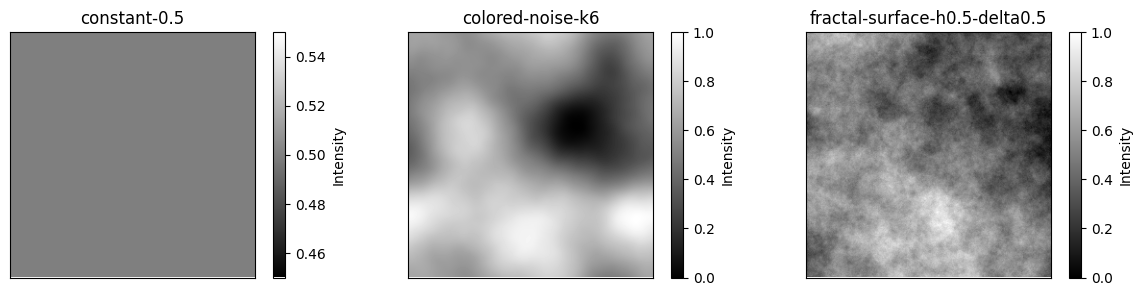

In [3]:
# Synthetic images
import data.Synthetic.images as synthetic_images

# Store the images in all_images dictionary
for item in synthetic_images.images:
    if item not in all_images:
        all_images[item] = synthetic_images.images[item]

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, item in enumerate(synthetic_images.images):
    im = axs[i].imshow(synthetic_images.images[item], cmap='gray')
    axs[i].set_title(f'{item}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

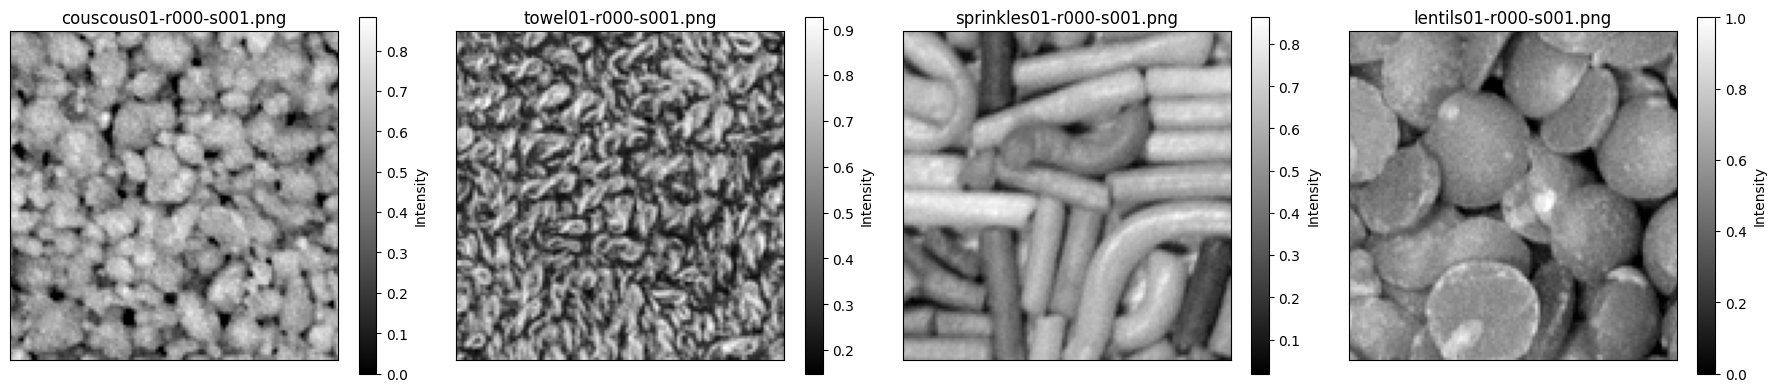

In [3]:
# Sintorn images
images_path = f'data/Sintorn/hardware'
images_filenames = chosen_filenames = [
    'couscous01-r000-s001.png',
    'towel01-r000-s001.png',
    'sprinkles01-r000-s001.png',
    'lentils01-r000-s001.png'
]

# Display the images
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
for i, filename in enumerate(images_filenames):
    gs_image = cv2.imread(f'{images_path}/{filename}', cv2.IMREAD_GRAYSCALE)
    gs_image = utils_functions.normalize_uint8_to_float64(gs_image)
    
    # Adds image to the all_images dictionary
    item = filename.split('.')[0]
    if item not in all_images:
        all_images[item] = gs_image
    
    im = axs[i].imshow(gs_image, cmap='gray')
    axs[i].set_title(f'{filename}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

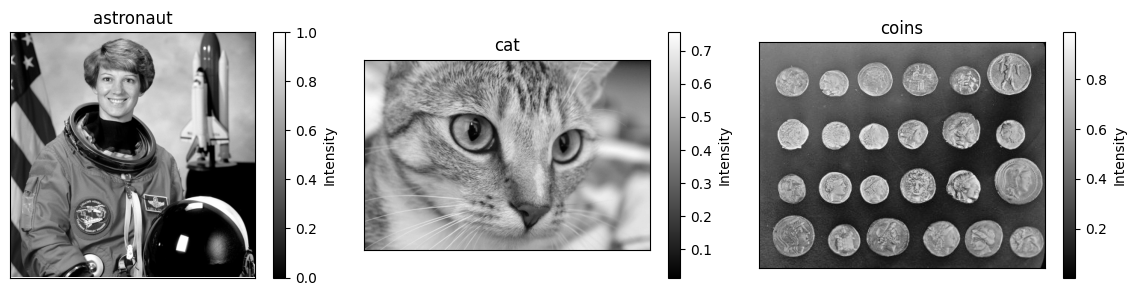

In [4]:
# Scikitlearn images
import data.Scikit.images as scikit_images

# Store the images in all_images dictionary
for item in scikit_images.images:
    if item not in all_images:
        all_images[item] = scikit_images.images[item]

# Display the images
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

for i, item in enumerate(scikit_images.images):
    im = axs[i].imshow(scikit_images.images[item], cmap='gray')
    axs[i].set_title(f'{item}')
    plt.colorbar(im, ax=axs[i], label='Intensity')
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
print(all_images.keys())

dict_keys(['couscous01-r000-s001', 'towel01-r000-s001', 'sprinkles01-r000-s001', 'lentils01-r000-s001', 'astronaut', 'cat', 'coins'])


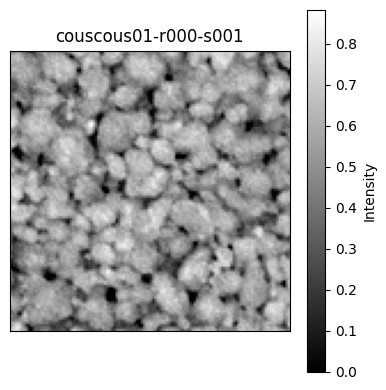

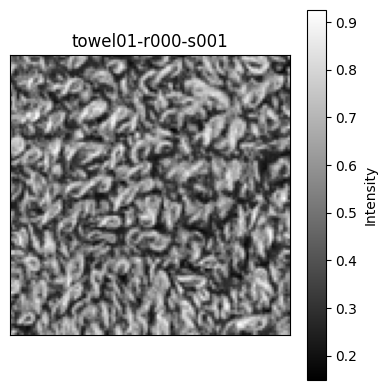

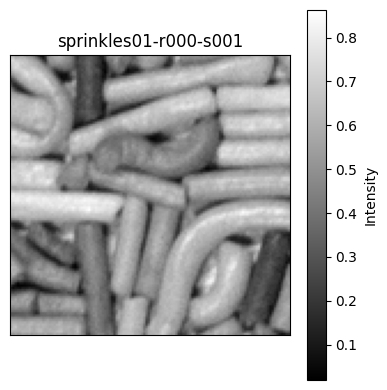

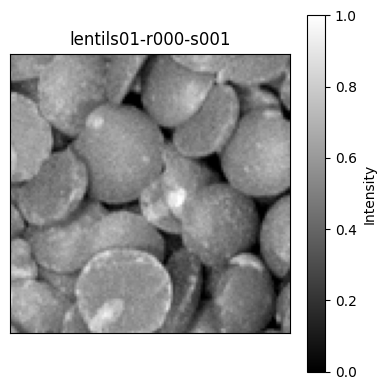

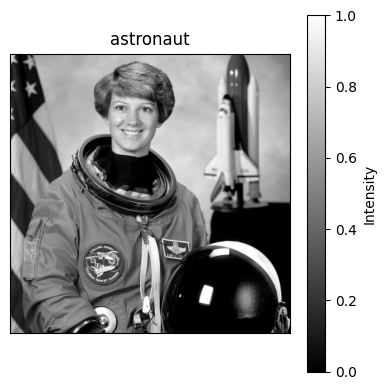

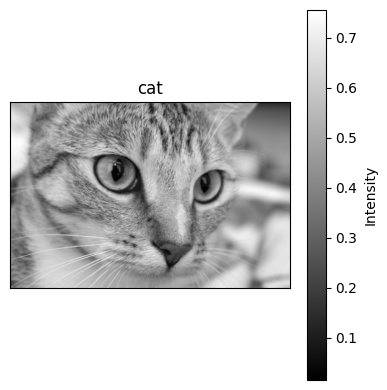

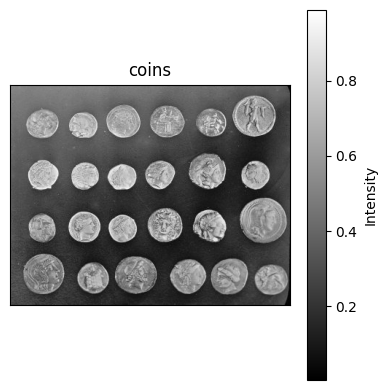

In [6]:
# Plot each image in all_images individually
for name, img in all_images.items():
    plt.figure(figsize=(4, 4))
    im = plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.colorbar(im, label='Intensity')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()


Noised image = 0.0 1.0 float64
Estimated Gaussian noise standard deviation = 0.09117121791530582


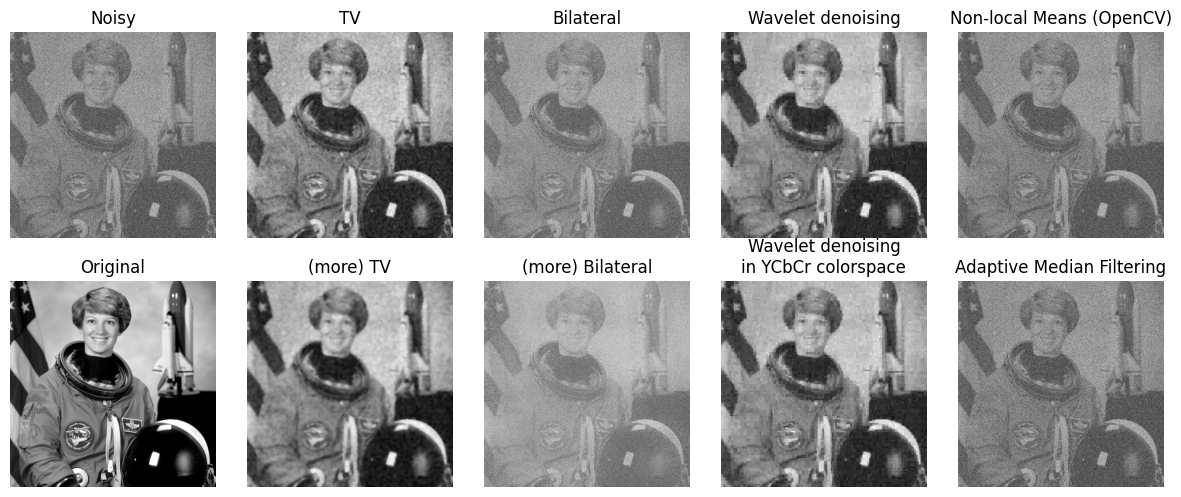

In [20]:
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)

import cv2 as cv
from scipy.ndimage import generic_filter

# Adaptive median filter function
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

test_image = all_images['astronaut']
# Gaussian noise
prob = 0.2
param = 0.3
noised_image = noise_gen.add_gaussian_noise(image=test_image, mean=0, sigma=param)
print("Noised image =", noised_image.min(), noised_image.max(), noised_image.dtype)
# Denoised - Est sigma
sigma_est = estimate_sigma(noised_image, channel_axis=None, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5), sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noised_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')

ax[0, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.1, channel_axis=None))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')

ax[0, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.05, sigma_spatial=15, channel_axis=None))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[0, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[0, 4].imshow(cv.fastNlMeansDenoising(np.uint8(noised_image*255)))
ax[0, 4].axis('off')
ax[0, 4].set_title('Non-local Means (OpenCV)')

ax[1, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.2, channel_axis=None))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')

ax[1, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.1, sigma_spatial=15, channel_axis=None))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')

ax[1, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')

ax[1, 4].imshow(generic_filter(noised_image, adaptive_median_filter, size=3))
ax[1, 4].axis('off')
ax[1, 4].set_title('Adaptive Median Filtering')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


Noised image = 0.0 1.0 float64
Estimated Gaussian noise standard deviation = 0.38078579518602446


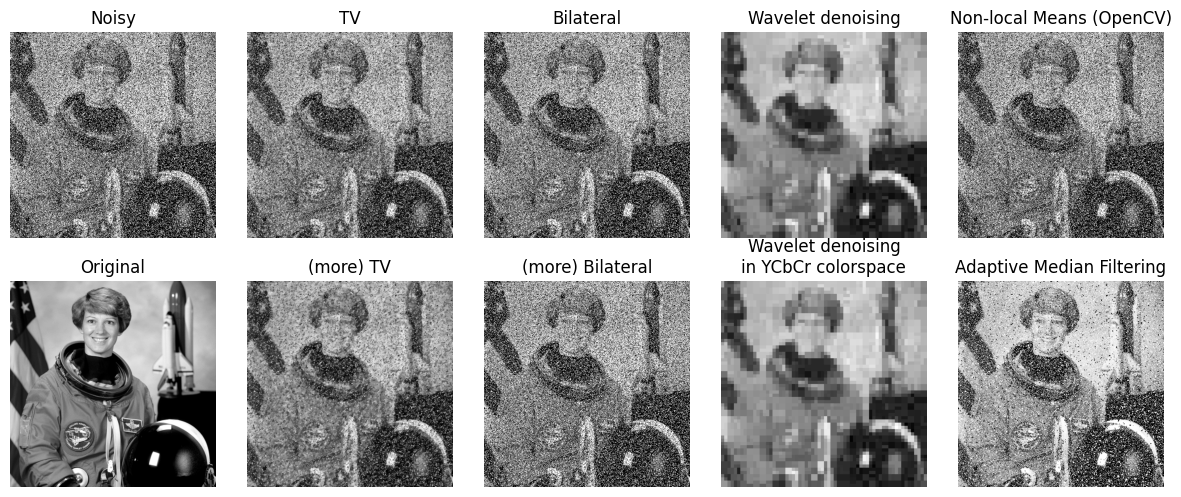

In [ ]:
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)

import cv2 as cv
from scipy.ndimage import generic_filter

# Adaptive median filter function
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

test_image = all_images['astronaut']
# SP noise
prob = 0.25
noised_image = noise_gen.add_sp_noise(test_image, prob, prob)
print("Noised image =", noised_image.min(), noised_image.max(), noised_image.dtype)
# Denoised - Est sigma
sigma_est = estimate_sigma(noised_image, channel_axis=None, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5), sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noised_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')

ax[0, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.1, channel_axis=None))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')

ax[0, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.05, sigma_spatial=15, channel_axis=None))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[0, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[0, 4].imshow(cv.fastNlMeansDenoising(np.uint8(noised_image*255)))
ax[0, 4].axis('off')
ax[0, 4].set_title('Non-local Means (OpenCV)')

ax[1, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.2, channel_axis=None))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')

ax[1, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.1, sigma_spatial=15, channel_axis=None))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')

ax[1, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')

ax[1, 4].imshow(generic_filter(noised_image, adaptive_median_filter, size=3))
ax[1, 4].axis('off')
ax[1, 4].set_title('Adaptive Median Filtering')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


Noised image = 0.0 1.0 float64
Estimated Gaussian noise standard deviation = 0.04191376590324602


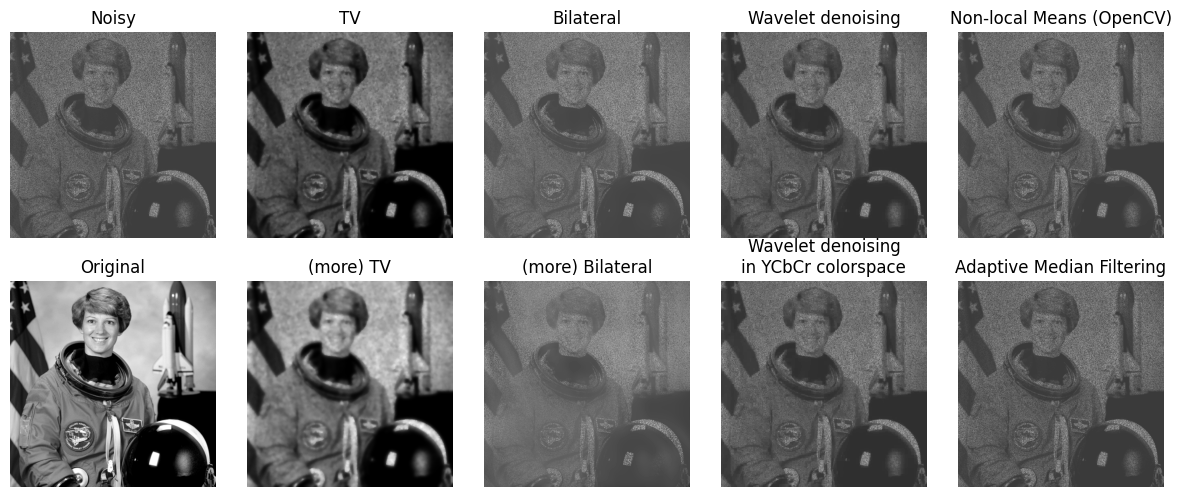

In [27]:
from skimage.restoration import (
    denoise_tv_chambolle,
    denoise_bilateral,
    denoise_wavelet,
    estimate_sigma,
)

import cv2 as cv
from scipy.ndimage import generic_filter

# Adaptive median filter function
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

test_image = all_images['astronaut']
# Speckle noise
sigma = 0.5
noised_image = noise_gen.add_speckle_noise(test_image, mean=0, sigma=sigma)
print("Noised image =", noised_image.min(), noised_image.max(), noised_image.dtype)
# Denoised - Est sigma
sigma_est = estimate_sigma(noised_image, channel_axis=None, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5), sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noised_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')

ax[0, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.1, channel_axis=None))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')

ax[0, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.05, sigma_spatial=15, channel_axis=None))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[0, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[0, 4].imshow(cv.fastNlMeansDenoising(np.uint8(noised_image*255)))
ax[0, 4].axis('off')
ax[0, 4].set_title('Non-local Means (OpenCV)')

ax[1, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.2, channel_axis=None))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')

ax[1, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.1, sigma_spatial=15, channel_axis=None))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')

ax[1, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')

ax[1, 4].imshow(generic_filter(noised_image, adaptive_median_filter, size=3))
ax[1, 4].axis('off')
ax[1, 4].set_title('Adaptive Median Filtering')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


Noised image = 0.0 1.0 float64
Estimated Gaussian noise standard deviation = 0.07566730299759716


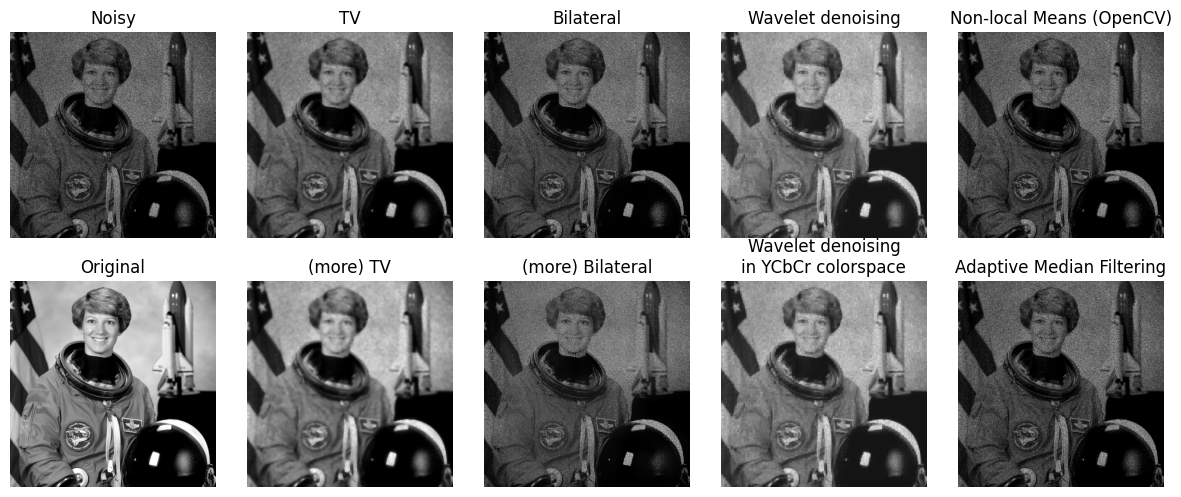

In [ ]:


# Adaptive median filter function
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

test_image = all_images['astronaut']

# Poisson noise
factor = 15
noised_image = noise_gen.add_poisson_noise_normalized(test_image, factor)
print("Noised image =", noised_image.min(), noised_image.max(), noised_image.dtype)
# Denoised - Est sigma
sigma_est = estimate_sigma(noised_image, channel_axis=None, average_sigmas=True)
print(f'Estimated Gaussian noise standard deviation = {sigma_est}')


fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 5), sharex=True, sharey=True)

plt.gray()

ax[0, 0].imshow(noised_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')

ax[0, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.1, channel_axis=None))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')

ax[0, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.05, sigma_spatial=15, channel_axis=None))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[0, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[0, 4].imshow(cv.fastNlMeansDenoising(np.uint8(noised_image*255)))
ax[0, 4].axis('off')
ax[0, 4].set_title('Non-local Means (OpenCV)')

ax[1, 1].imshow(denoise_tv_chambolle(noised_image, weight=0.2, channel_axis=None))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')

ax[1, 2].imshow(denoise_bilateral(noised_image, sigma_color=0.1, sigma_spatial=15, channel_axis=None))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')

ax[1, 3].imshow(denoise_wavelet(noised_image, channel_axis=None, rescale_sigma=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')

ax[1, 4].imshow(generic_filter(noised_image, adaptive_median_filter, size=3))
ax[1, 4].axis('off')
ax[1, 4].set_title('Adaptive Median Filtering')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()


In [18]:
print(all_images.keys())

dict_keys(['couscous01-r000-s001', 'towel01-r000-s001', 'sprinkles01-r000-s001', 'lentils01-r000-s001', 'astronaut', 'cat', 'coins'])


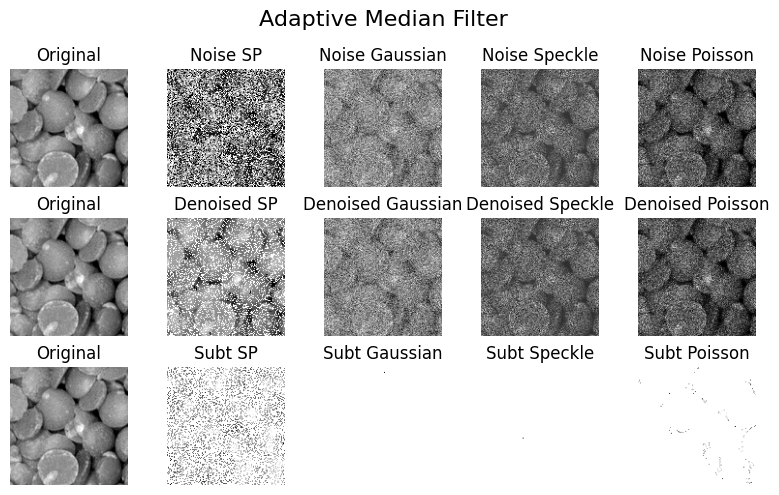

In [25]:
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

def formatDecimal(number):
    return f"{number:.2f}"

test_image = all_images['lentils01-r000-s001']

# SP noise
prob = 0.25
noised_image_sp = noise_gen.add_sp_noise(test_image, prob, prob)
sp_denoised = generic_filter(noised_image_sp, adaptive_median_filter, size=5)
subtracted_sp = utils_functions.normalize_outbound_to_float64(noised_image_sp - sp_denoised)

# Gaussian noise
param = 0.3
noised_image_gaussian = noise_gen.add_gaussian_noise(image=test_image, mean=0, sigma=param)
gaussian_denoised = generic_filter(noised_image_gaussian, adaptive_median_filter, size=5)
subtracted_gaussian = utils_functions.normalize_outbound_to_float64(noised_image_gaussian - gaussian_denoised)

# Poisson noise
factor = 15
noised_image_poisson = noise_gen.add_poisson_noise_normalized(test_image, factor)
poisson_denoised = generic_filter(noised_image_poisson, adaptive_median_filter, size=5)
subtracted_poisson = utils_functions.normalize_outbound_to_float64(noised_image_poisson - poisson_denoised)

# Speckle noise
sigma = 0.5
noised_image_speckle = noise_gen.add_speckle_noise(test_image, mean=0, sigma=sigma)
speckle_denoised = generic_filter(noised_image_speckle, adaptive_median_filter, size=5)
subtracted_speckle = utils_functions.normalize_outbound_to_float64(noised_image_speckle - speckle_denoised)

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(8, 5), sharex=True, sharey=True)
fig.suptitle('Adaptive Median Filter', fontsize=16)

plt.gray()

ax[0, 0].imshow(test_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')

ax[0, 1].imshow(noised_image_sp)
ax[0, 1].axis('off')
ax[0, 1].set_title('Noise SP')

ax[0, 2].imshow(noised_image_gaussian)
ax[0, 2].axis('off')
ax[0, 2].set_title('Noise Gaussian')

ax[0, 3].imshow(noised_image_speckle)
ax[0, 3].axis('off')
ax[0, 3].set_title('Noise Speckle')

ax[0, 4].imshow(noised_image_poisson)
ax[0, 4].axis('off')
ax[0, 4].set_title('Noise Poisson')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

ax[1, 1].imshow(sp_denoised)
ax[1, 1].axis('off')
ax[1, 1].set_title('Denoised SP')

ax[1, 2].imshow(gaussian_denoised)
ax[1, 2].axis('off')
ax[1, 2].set_title('Denoised Gaussian')

ax[1, 3].imshow(speckle_denoised)
ax[1, 3].axis('off')
ax[1, 3].set_title('Denoised Speckle')

ax[1, 4].imshow(poisson_denoised)
ax[1, 4].axis('off')
ax[1, 4].set_title('Denoised Poisson')

ax[2, 0].imshow(test_image)
ax[2, 0].axis('off')
ax[2, 0].set_title('Original')

ax[2, 1].imshow(subtracted_sp)
ax[2, 1].axis('off')
ax[2, 1].set_title(f'Subt SP')

ax[2, 2].imshow(subtracted_gaussian)
ax[2, 2].axis('off')
ax[2, 2].set_title(f'Subt Gaussian')

ax[2, 3].imshow(subtracted_speckle)
ax[2, 3].axis('off')
ax[2, 3].set_title(f'Subt Speckle')

ax[2, 4].imshow(subtracted_poisson)
ax[2, 4].axis('off')
ax[2, 4].set_title(f'Subt Poisson')

fig.tight_layout()

plt.show()

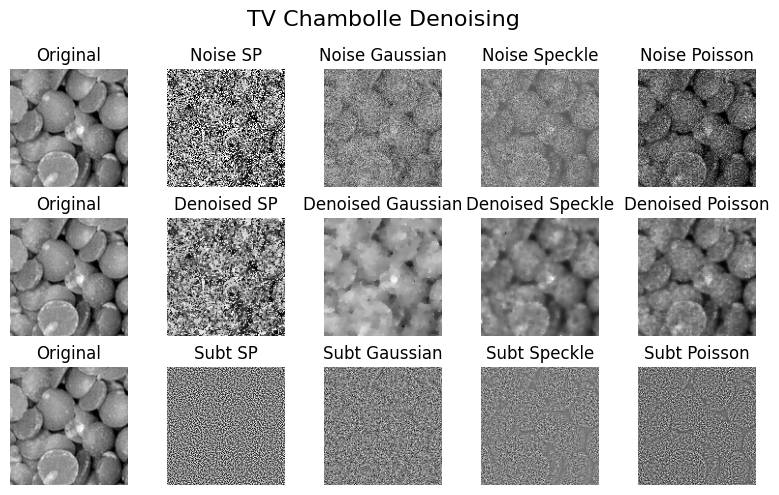

In [26]:
test_image = all_images['lentils01-r000-s001']

# SP noise
prob = 0.25
noised_image_sp = noise_gen.add_sp_noise(test_image, prob, prob)
sp_denoised = denoise_tv_chambolle(noised_image_sp, weight=0.1, channel_axis=None)
subtracted_sp = utils_functions.normalize_outbound_to_float64(noised_image_sp - sp_denoised)

# Gaussian noise
param = 0.3
noised_image_gaussian = noise_gen.add_gaussian_noise(image=test_image, mean=0, sigma=param)
gaussian_denoised = denoise_tv_chambolle(noised_image_gaussian, weight=0.1, channel_axis=None)
subtracted_gaussian = utils_functions.normalize_outbound_to_float64(noised_image_gaussian - gaussian_denoised)

# Poisson noise
factor = 15
noised_image_poisson = noise_gen.add_poisson_noise_normalized(test_image, factor)
poisson_denoised = denoise_tv_chambolle(noised_image_poisson, weight=0.1, channel_axis=None)
subtracted_poisson = utils_functions.normalize_outbound_to_float64(noised_image_poisson - poisson_denoised)

# Speckle noise
sigma = 0.5
noised_image_speckle = noise_gen.add_speckle_noise(test_image, mean=0, sigma=sigma)
speckle_denoised = denoise_tv_chambolle(noised_image_speckle, weight=0.1, channel_axis=None)
subtracted_speckle = utils_functions.normalize_outbound_to_float64(noised_image_speckle - speckle_denoised)

fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(8, 5), sharex=True, sharey=True)
fig.suptitle('TV Chambolle Denoising', fontsize=16)

plt.gray()

ax[0, 0].imshow(test_image)
ax[0, 0].axis('off')
ax[0, 0].set_title('Original')

ax[0, 1].imshow(noised_image_sp)
ax[0, 1].axis('off')
ax[0, 1].set_title('Noise SP')

ax[0, 2].imshow(noised_image_gaussian)
ax[0, 2].axis('off')
ax[0, 2].set_title('Noise Gaussian')

ax[0, 3].imshow(noised_image_speckle)
ax[0, 3].axis('off')
ax[0, 3].set_title('Noise Speckle')

ax[0, 4].imshow(noised_image_poisson)
ax[0, 4].axis('off')
ax[0, 4].set_title('Noise Poisson')

ax[1, 0].imshow(test_image)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

ax[1, 1].imshow(sp_denoised)
ax[1, 1].axis('off')
ax[1, 1].set_title('Denoised SP')

ax[1, 2].imshow(gaussian_denoised)
ax[1, 2].axis('off')
ax[1, 2].set_title('Denoised Gaussian')

ax[1, 3].imshow(speckle_denoised)
ax[1, 3].axis('off')
ax[1, 3].set_title('Denoised Speckle')

ax[1, 4].imshow(poisson_denoised)
ax[1, 4].axis('off')
ax[1, 4].set_title('Denoised Poisson')

ax[2, 0].imshow(test_image)
ax[2, 0].axis('off')
ax[2, 0].set_title('Original')

ax[2, 1].imshow(subtracted_sp)
ax[2, 1].axis('off')
ax[2, 1].set_title(f'Subt SP')

ax[2, 2].imshow(subtracted_gaussian)
ax[2, 2].axis('off')
ax[2, 2].set_title(f'Subt Gaussian')

ax[2, 3].imshow(subtracted_speckle)
ax[2, 3].axis('off')
ax[2, 3].set_title(f'Subt Speckle')

ax[2, 4].imshow(subtracted_poisson)
ax[2, 4].axis('off')
ax[2, 4].set_title(f'Subt Poisson')

fig.tight_layout()

plt.show()

In [ ]:
def plot_noise_denoising_analysis(image, image_name, noise_type, noise_params, denoise_function, denoise_params=None, figsize=(15, 8)):
    """
    Create a comprehensive visualization of noise addition, denoising, and subtraction analysis.
    
    Parameters:
    -----------
    image : numpy.ndarray
        The original image to process
    image_name : str
        Name of the image for the plot title
    noise_type : str
        Type of noise ('salt_and_pepper', 'gaussian', 'speckle', 'poisson')
    noise_params : list
        List of 6 noise parameters to apply progressively
    denoise_function : callable
        Function to apply for denoising (e.g., denoise_tv_chambolle or adaptive_median_filter)
    denoise_params : dict, optional
        Parameters to pass to the denoising function
    figsize : tuple, optional
        Figure size (width, height)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated figure
    """
    if denoise_params is None:
        denoise_params = {}
    
    # Create figure with 3x7 subplots
    fig, axes = plt.subplots(3, 7, figsize=figsize, sharex=True, sharey=True)
    
    # Set overall title
    noise_type_display = noise_type.replace('_', ' ').title()
    denoise_name = denoise_function.__name__.replace('_', ' ').title()
    fig.suptitle(f'{image_name} - {noise_type_display} Noise - {denoise_name}', fontsize=16, fontweight='bold')
    
    # Use grayscale colormap
    plt.gray()
    
    # Initialize lists to store images for each row
    noisy_images = [image]  # First image is original
    denoised_images = []
    subtracted_images = []
    
    # Generate noisy images
    for param in noise_params:
        if noise_type == 'salt_and_pepper':
            noisy_img = noise_gen.add_sp_noise(image, param, param)
        elif noise_type == 'gaussian':
            noisy_img = noise_gen.add_gaussian_noise(image=image, mean=0, sigma=param)
        elif noise_type == 'speckle':
            noisy_img = noise_gen.add_speckle_noise(image, mean=0, sigma=param)
        elif noise_type == 'poisson':
            noisy_img = noise_gen.add_poisson_noise_normalized(image, param)
        else:
            raise ValueError(f"Unsupported noise type: {noise_type}")
        
        noisy_images.append(noisy_img)
    
    # Apply denoising to all images (including original)
    for noisy_img in noisy_images:
        if denoise_function.__name__ == 'adaptive_median_filter':
            # Special handling for adaptive median filter
            size = denoise_params.get('size', 5)
            denoised_img = generic_filter(noisy_img, denoise_function, size=size)
        else:
            # For sklearn denoising functions
            denoised_img = denoise_function(noisy_img, **denoise_params)
        
        denoised_images.append(denoised_img)
    
    # Calculate subtracted images
    for noisy_img, denoised_img in zip(noisy_images, denoised_images):
        subtracted_img = utils_functions.normalize_outbound_to_float64(noisy_img - denoised_img)
        subtracted_images.append(subtracted_img)
    
    # Plot all images
    for col in range(7):
        # First row: Original + Noisy images
        axes[0, col].imshow(noisy_images[col], cmap='gray')
        axes[0, col].axis('off')
        if col == 0:
            axes[0, col].set_title('Original', fontsize=10)
        else:
            param_value = noise_params[col-1]
            axes[0, col].set_title(f'Param: {param_value:.3f}', fontsize=10)
        
        # Second row: Denoised images
        axes[1, col].imshow(denoised_images[col], cmap='gray')
        axes[1, col].axis('off')
        if col == 0:
            axes[1, col].set_title('Denoised Orig', fontsize=10)
        else:
            axes[1, col].set_title(f'Denoised', fontsize=10)
        
        # Third row: Subtracted images
        axes[2, col].imshow(subtracted_images[col], cmap='gray')
        axes[2, col].axis('off')
        if col == 0:
            axes[2, col].set_title('Subtracted Orig', fontsize=10)
        else:
            axes[2, col].set_title(f'Subtracted', fontsize=10)
    
    # Add row labels
    axes[0, 0].set_ylabel('Noisy', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Denoised', fontsize=12, fontweight='bold')
    axes[2, 0].set_ylabel('Subtracted', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    return fig

# Helper function for adaptive median filter
def adaptive_median_filter_wrapper(image, size=5):
    """Wrapper for adaptive median filter to work with the plotting function"""
    return generic_filter(image, adaptive_median_filter, size=size)

# Usage examples:
# Define noise parameters (using the ones from your code)
noise_param_sp = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
noise_param_gaussian = [0.05, 0.25, 0.45, 0.65, 0.85, 1.0]
noise_param_speckle = [0.05, 0.3, 0.6, 0.9, 1.2, 1.5]
noise_param_poisson = [0.05, 1.0, 3.0, 6.0, 15.0, 50.0]

# Example usage for all images and all noise types:
for image_name, image in all_images.items():
    print(f"Generating plots for {image_name}...")
    
    # Salt and Pepper noise with Adaptive Median Filter
    fig1 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='salt_and_pepper',
        noise_params=noise_param_sp,
        denoise_function=adaptive_median_filter_wrapper,
        denoise_params={'size': 5}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_salt_pepper_adaptive_median.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Salt and Pepper noise with Chambolle
    fig2 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='salt_and_pepper',
        noise_params=noise_param_sp,
        denoise_function=denoise_tv_chambolle,
        denoise_params={'weight': 0.1, 'channel_axis': None}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_salt_pepper_tv_chambolle.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Gaussian noise with Adaptive Median Filter
    fig3 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='gaussian',
        noise_params=noise_param_gaussian,
        denoise_function=adaptive_median_filter_wrapper,
        denoise_params={'size': 5}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_gaussian_adaptive_median.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Gaussian noise with TV Chambolle
    fig4 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='gaussian',
        noise_params=noise_param_gaussian,
        denoise_function=denoise_tv_chambolle,
        denoise_params={'weight': 0.1, 'channel_axis': None}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_gaussian_tv_chambolle.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Speckle noise with Adaptive Median Filter
    fig5 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='speckle',
        noise_params=noise_param_speckle,
        denoise_function=adaptive_median_filter_wrapper,
        denoise_params={'size': 5}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_speckle_adaptive_median.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Speckle noise with TV Chambolle
    fig6 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='speckle',
        noise_params=noise_param_speckle,
        denoise_function=denoise_tv_chambolle,
        denoise_params={'weight': 0.1, 'channel_axis': None}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_speckle_tv_chambolle.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Poisson noise with Median Adaptive Filter
    fig7 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='poisson',
        noise_params=noise_param_poisson,
        denoise_function=adaptive_median_filter_wrapper,
        denoise_params={'size': 5}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_poisson_adaptive_median.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Poisson noise with Chambolle
    fig8 = plot_noise_denoising_analysis(
        image=image,
        image_name=image_name,
        noise_type='poisson',
        noise_params=noise_param_poisson,
        denoise_function=denoise_tv_chambolle,
        denoise_params={'weight': 0.1, 'channel_axis': None}
    )
    plt.savefig(f'results/qualificacao_noises/denoising_images/noise_param/{image_name}_poisson_chambolle.png', dpi=300, bbox_inches='tight')
    plt.show()

# # Alternative: Generate for a specific image and noise type
# test_image = all_images['lentils01-r000-s001']

# fig = plot_noise_denoising_analysis(
#     image=test_image,
#     image_name='Lentils',
#     noise_type='salt_and_pepper',
#     noise_params=noise_param_sp,
#     denoise_function=adaptive_median_filter_wrapper,
#     denoise_params={'size': 5}
# )
# plt.show()

In [ ]:
def plot_denoising_parameter_analysis(image, image_name, denoise_method, param_values, noisy_image=None, noise_info="", figsize=(15, 6)):
    """
    Analyze the effect of different parameter values on image denoising.
    
    Parameters:
    -----------
    image : numpy.ndarray
        The original clean image
    image_name : str
        Name of the image for the plot title
    denoise_method : str
        Denoising method ('tv_chambolle' or 'adaptive_median')
    param_values : list
        List of parameter values to test (weight for TV Chambolle, size for Adaptive Median)
    noisy_image : numpy.ndarray, optional
        The noisy image to denoise. If None, uses the original image
    noise_info : str, optional
        Information about the noise for the title
    figsize : tuple, optional
        Figure size (width, height)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The generated figure
    """
    # Use noisy image if provided, otherwise use original
    input_image = noisy_image if noisy_image is not None else image
    
    # Calculate number of columns (original + param values)
    n_cols = len(param_values) + 2  # +2 for original and noisy
    
    # Create figure
    fig, axes = plt.subplots(2, n_cols, figsize=figsize, sharex=True, sharey=True)
    
    # Set overall title
    method_name = "TV Chambolle" if denoise_method == 'tv_chambolle' else "Adaptive Median Filter"
    param_name = "Weight" if denoise_method == 'tv_chambolle' else "Size"
    title = f'{image_name} - {method_name} Parameter Analysis'
    if noise_info:
        title += f' ({noise_info})'
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # Use grayscale colormap
    plt.gray()
    
    # First row: Original and noisy image, then denoised images
    # First column: Original image
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].axis('off')
    axes[0, 0].set_title('Original', fontsize=10)
    
    # Second column: Noisy image (if provided)
    if noisy_image is not None:
        axes[0, 1].imshow(noisy_image, cmap='gray')
        axes[0, 1].axis('off')
        axes[0, 1].set_title('Noisy', fontsize=10)
        start_col = 2
    else:
        # If no noisy image, show original again
        axes[0, 1].imshow(image, cmap='gray')
        axes[0, 1].axis('off')
        axes[0, 1].set_title('Input', fontsize=10)
        start_col = 2
    
    # Apply denoising with different parameter values
    denoised_images = []
    for i, param_val in enumerate(param_values):
        col_idx = start_col + i
        
        if denoise_method == 'tv_chambolle':
            denoised_img = denoise_tv_chambolle(input_image, weight=param_val, channel_axis=None)
            param_text = f'{param_name}: {param_val:.2f}'
        elif denoise_method == 'adaptive_median':
            denoised_img = generic_filter(input_image, adaptive_median_filter, size=int(param_val))
            param_text = f'{param_name}: {int(param_val)}'
        else:
            raise ValueError(f"Unsupported denoising method: {denoise_method}")
        
        denoised_images.append(denoised_img)
        
        # Plot denoised image
        axes[0, col_idx].imshow(denoised_img, cmap='gray')
        axes[0, col_idx].axis('off')
        axes[0, col_idx].set_title(param_text, fontsize=10)
    
    # Second row: Difference images (input - denoised)
    # First column: Zero difference for original
    zero_diff = np.zeros_like(image)
    axes[1, 0].imshow(zero_diff, cmap='gray')
    axes[1, 0].axis('off')
    axes[1, 0].set_title('No Difference', fontsize=10)
    
    # Second column: Input vs input (zero difference)
    axes[1, 1].imshow(zero_diff, cmap='gray')
    axes[1, 1].axis('off')
    axes[1, 1].set_title('No Difference', fontsize=10)
    
    # Difference images for each parameter
    for i, (param_val, denoised_img) in enumerate(zip(param_values, denoised_images)):
        col_idx = start_col + i
        
        # Calculate difference (what was removed by denoising)
        diff_img = utils_functions.normalize_outbound_to_float64(input_image - denoised_img)
        
        axes[1, col_idx].imshow(diff_img, cmap='gray')
        axes[1, col_idx].axis('off')
        axes[1, col_idx].set_title('Removed', fontsize=10)
    
    # Add row labels
    axes[0, 0].set_ylabel('Denoised', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Difference', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    return fig, denoised_images

# Usage examples:

# Define parameter values to test
tv_weights = [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]  # TV Chambolle weights
median_sizes = [3, 5, 7, 9, 11, 13]  # Adaptive Median filter sizes

# Test with a clean image (no noise)
# test_image = all_images['astronaut']

# # 1. Test TV Chambolle on clean image
# fig1, denoised_imgs1 = plot_denoising_parameter_analysis(
#     image=test_image,
#     image_name='Astronaut',
#     denoise_method='tv_chambolle',
#     param_values=tv_weights,
#     figsize=(18, 8)
# )
# plt.show()

# # 2. Test Adaptive Median on clean image
# fig2, denoised_imgs2 = plot_denoising_parameter_analysis(
#     image=test_image,
#     image_name='Astronaut',
#     denoise_method='adaptive_median',
#     param_values=median_sizes,
#     figsize=(18, 8)
# )
# plt.show()

# # 3. Test with noisy image - Salt and Pepper noise
# noisy_sp = noise_gen.add_sp_noise(test_image, 0.1, 0.1)

# fig3, denoised_imgs3 = plot_denoising_parameter_analysis(
#     image=test_image,
#     image_name='Astronaut',
#     denoise_method='adaptive_median',
#     param_values=median_sizes,
#     noisy_image=noisy_sp,
#     noise_info="Salt & Pepper (0.1)",
#     figsize=(18, 8)
# )
# plt.show()

# # 4. Test with noisy image - Gaussian noise
# noisy_gaussian = noise_gen.add_gaussian_noise(test_image, mean=0, sigma=0.3)

# fig4, denoised_imgs4 = plot_denoising_parameter_analysis(
#     image=test_image,
#     image_name='Astronaut',
#     denoise_method='tv_chambolle',
#     param_values=tv_weights,
#     noisy_image=noisy_gaussian,
#     noise_info="Gaussian (σ=0.3)",
#     figsize=(18, 8)
# )
# plt.show()

# 5. Comprehensive analysis for all images with different noise types
def comprehensive_parameter_analysis(images_dict, noise_params_dict):
    """
    Run parameter analysis for all images and noise types
    """
    tv_weights = [0.05, 0.1, 0.2, 0.3, 0.5]
    median_sizes = [3, 5, 7, 9, 11]
    
    for image_name, image in images_dict.items():
        print(f"Analyzing {image_name}...")
        
        # Clean image analysis
        fig_tv_clean, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='tv_chambolle', param_values=tv_weights,
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_tv_clean.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        fig_median_clean, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='adaptive_median', param_values=median_sizes,
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_median_clean.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        # Noisy image analysis
        # Salt and Pepper
        noisy_sp = noise_gen.add_sp_noise(image, 0.2, 0.2)
        fig_median_sp, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='adaptive_median', param_values=median_sizes,
            noisy_image=noisy_sp, noise_info="S&P (0.2)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_median_sp.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        fig_tv_sp, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='tv_chambolle', param_values=tv_weights,
            noisy_image=noisy_sp, noise_info="S&P (0.2)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_tv_sp.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        # Gaussian noise
        noisy_gaussian = noise_gen.add_gaussian_noise(image, mean=0, sigma=0.25)
        fig_median_gaussian, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='adaptive_median', param_values=median_sizes,
            noisy_image=noisy_gaussian, noise_info="Gaussian (σ=0.25)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_median_gaussian.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        fig_tv_gaussian, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='tv_chambolle', param_values=tv_weights,
            noisy_image=noisy_gaussian, noise_info="Gaussian (σ=0.25)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_tv_gaussian.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        
        # Speckle noise
        noisy_speckle = noise_gen.add_speckle_noise(image, mean=0, sigma=0.3)
        fig_median_speckle, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='adaptive_median', param_values=median_sizes,
            noisy_image=noisy_speckle, noise_info="Speckle (var=0.3)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_median_speckle.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        fig_tv_speckle, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='tv_chambolle', param_values=tv_weights,
            noisy_image=noisy_speckle, noise_info="Speckle (var=0.3)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_tv_speckle.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        
        
        # Poisson noise
        noisy_poisson = noise_gen.add_poisson_noise(image, factor=6)
        fig_median_poisson, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='adaptive_median', param_values=median_sizes,
            noisy_image=noisy_poisson, noise_info="Poisson (factor=6)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_median_poisson.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()
        fig_tv_poisson, _ = plot_denoising_parameter_analysis(
            image=image, image_name=image_name,
            denoise_method='tv_chambolle', param_values=tv_weights,
            noisy_image=noisy_poisson, noise_info="Poisson (factor=6)",
            figsize=(15, 6)
        )
        plt.savefig(f'results/qualificacao_noises/denoising_images/denoise_param/{image_name}_tv_poisson.png', 
                   dpi=300, bbox_inches='tight')
        plt.show()

# Run comprehensive analysis (uncomment to use)
comprehensive_parameter_analysis(all_images, {})

Generating data...

In [45]:
def adaptive_median_filter(pixels):
    center = pixels[len(pixels) // 2]
    sorted_pixels = sorted(pixels)
    median = sorted_pixels[len(sorted_pixels) // 2]
    return median if center == 0 or center == 255 else center

In [46]:
# Process all images
noise_types = ['original', 'salt_and_pepper', 'speckle', 'gaussian', 'poisson']

# sets the probabilities used
noise_param_sp = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] # salt and pepper
noise_param_sp = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5] # salt and pepper
noise_param_gaussian = [0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ] # gaussian
noise_param_gaussian = [0.05, 0.25, 0.45, 0.65, 0.85, 1.  ] # gaussian
noise_param_speckle = [0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
       1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ] # speckle
noise_param_speckle = [0.05, 0.3 ,0.6, 0.9, 1.2, 1.5 ] # speckle
noise_param_poisson = [0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5,
           3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0, 30.0, 50.0] # poisson
noise_param_poisson = [0.05, 1.0, 3.0, 6.0, 15.0, 50.0] # poisson

image_data_list = []
for i, item in enumerate(all_images):
    print(f"Processing image {i+1}/{len(all_images)}: {item}")
    # get image
    gs_image = all_images[item]
    img_filename = item
    # extract metrics
    print("\tExtracting data")
    image_data = get_img_info_simple(gs_image)
    # add the information
    image_data['image_name'] = img_filename
    image_data['noise_type'] = 'original'
    image_data['noise_param'] = 0
    image_data_list.append(image_data)
    # adds no noise information to each noise_type
    for n_type in noise_types:
        if n_type != 'original':
            # adds the information
            image_data = image_data.copy()
            image_data['noise_type'] = n_type
            image_data_list.append(image_data)

    # adds s&p noise
    print("\tAdding S&P noise")
    for prob in noise_param_sp:
        print(f"\t\tProbability = {prob}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_sp_noise(gs_image, prob, prob)
        denoised_image = generic_filter(noised_image, adaptive_median_filter, size=5)
        subtracted_image = utils_functions.normalize_outbound_to_float64(noised_image - denoised_image)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(subtracted_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'salt_and_pepper'
        noised_image_data['noise_param'] = prob
        image_data_list.append(noised_image_data)
    # adds gaussian noise
    print("\tAdding Gaussian noise")
    for param in noise_param_gaussian:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_gaussian_noise(image=gs_image, mean=0, sigma=param)
        denoised_image = generic_filter(noised_image, adaptive_median_filter, size=5)
        subtracted_image = utils_functions.normalize_outbound_to_float64(noised_image - denoised_image)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(subtracted_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'gaussian'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds speckle noise
    print("\tAdding Speckle noise")
    for param in noise_param_speckle:
        print(f"\t\tSigma = {param}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_speckle_noise(gs_image, mean=0, sigma=param)
        denoised_image = generic_filter(noised_image, adaptive_median_filter, size=5)
        subtracted_image = utils_functions.normalize_outbound_to_float64(noised_image - denoised_image)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(subtracted_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'speckle'
        noised_image_data['noise_param'] = param
        image_data_list.append(noised_image_data)
    # adds poisson noise
    print("\tAdding Poisson noise")
    for factor in noise_param_poisson:
        print(f"\t\tFactor = {factor}")
        # generate noise image
        print("\t\tGenerating noised image")
        noised_image = noise_gen.add_poisson_noise_normalized(gs_image, factor)
        denoised_image = generic_filter(noised_image, adaptive_median_filter, size=5)
        subtracted_image = utils_functions.normalize_outbound_to_float64(noised_image - denoised_image)
        # extract metrics
        print("\t\tExtracting data")
        noised_image_data = get_img_info_simple(subtracted_image)
        # add the information
        noised_image_data['image_name'] = img_filename
        noised_image_data['noise_type'] = 'poisson'
        noised_image_data['noise_param'] = factor
        image_data_list.append(noised_image_data)

Processing image 1/7: couscous01-r000-s001
	Extracting data
	Adding S&P noise
		Probability = 0.05
		Generating noised image
		Extracting data
		Probability = 0.1
		Generating noised image
		Extracting data
		Probability = 0.2
		Generating noised image
		Extracting data
		Probability = 0.3
		Generating noised image
		Extracting data
		Probability = 0.4
		Generating noised image
		Extracting data
		Probability = 0.5
		Generating noised image
		Extracting data
	Adding Gaussian noise
		Sigma = 0.05
		Generating noised image
		Extracting data
		Sigma = 0.25
		Generating noised image
		Extracting data
		Sigma = 0.45
		Generating noised image
		Extracting data
		Sigma = 0.65
		Generating noised image
		Extracting data
		Sigma = 0.85
		Generating noised image
		Extracting data
		Sigma = 1.0
		Generating noised image
		Extracting data
	Adding Speckle noise
		Sigma = 0.05
		Generating noised image
		Extracting data
		Sigma = 0.3
		Generating noised image
		Extracting data
		Sigma = 0.6
		Genera

In [47]:
data_default_aux = pd.concat(image_data_list, ignore_index=True)
data_default_aux.to_csv(f"results/qualificacao_noises/denoising_images/adaptive_median_filter.csv", index=False)